# Lab | Model Fitting and Evaluating.

## Activity (Tuesday)

## Linear Regression

## 1 X-y split (y is the target variable, in this case, "total claim amount")
## 2 Train-test split.
## 3 Standardize the data (after the data split!).
## 4 Apply linear regression.
## 5 Model Interpretation.

## Load the data 

In [2]:
import pandas as pd 
import seaborn as sns

In [3]:
df = pd.read_csv('marketing_customer_analysis_clean.csv')

In [4]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [5]:
# Isolate numerical variables 

numericals_df = df.select_dtypes(include=['number'])

In [6]:
numericals_df.head()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1


In [7]:
numericals_df = numericals_df.dropna()

In [8]:
numericals_df = numericals_df.drop_duplicates()

## 1 X-y split (y is the target variable, in this case, "total claim amount")

In [9]:
X = numericals_df.drop(["total_claim_amount"], axis=1)
y = numericals_df[["total_claim_amount"]]

## 2 Train-test split

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

## 3 Standardize the data 

In [445]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Fit the PowerTransformer to your training data

# Side note: How do we decide whether to use PowerTransformer vs MinMaxScaler vs StandardScaler? 
# Source Chat GPT (31.01.24) 

    # Decision Criteria:

    # 1 Distribution of Data:

# - If your data is normally distributed or can be transformed to be more Gaussian-like, consider PowerTransformer.
# - If your data has varying ranges and you want a specific range, consider MinMaxScaler.
# - If your data has different means and standard deviations, and you want to standardize, consider StandardScaler.

    # 2 Handling Outliers:

# - If your data contains outliers and you want a more robust scaler, PowerTransformer is generally less sensitive to outliers.
# - StandardScaler is also less sensitive to outliers compared to MinMaxScaler.

    # 3 Model Assumptions:

# Consider the assumptions of the models you plan to use. Some models assume that features are normally distributed or have certain scaling characteristics.
# Experimentation:

    # 4 Experiment with different scalers and evaluate their impact on your specific machine learning model's performance.

In [446]:
scaler = PowerTransformer() # Here I opted for PowerTransformer as many of the numerical variables have a skew

pt = scaler # Abbreviated for ease of coding 

X_train_fit = pt.fit(X_train) 

# Transform the training data

X_train_trans = pt.transform(X_train)

# Transform X_test data 

X_test_trans = pt.transform(X_test)

## 4 Apply linear regression.

In [447]:
from sklearn.linear_model import LinearRegression

In [448]:
lm = LinearRegression()
model = lm.fit(X_train_trans,y_train)

In [449]:
model.coef_

array([[ 9.82399068e-02,  1.12738011e+01, -1.04032839e+02,
         1.53052473e+02,  3.50539681e+00, -3.85903839e+00,
        -1.41103257e+00, -7.66019405e+00, -2.09632903e-01]])

In [450]:
model.intercept_

array([434.60833836])

## 5 Model Interpretation.

In [451]:
# Predict total claim amount based on income 

In [452]:
random_customer = X_test.sample()

In [453]:
random_customer

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
10750,10750,4386.277558,10621,67,28.0,22,0.0,5,2


In [454]:
model.predict(random_customer)

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[-1043763.02533519]])

## Create predictions for test set

In [455]:
y_pred = model.predict(X_test_trans)

In [456]:
y_pred = pd.DataFrame(y_pred)

In [457]:
y_test = y_test.reset_index(drop=True)

In [458]:
resiudals_df = pd.concat([y_test,y_pred],axis=1)

In [459]:
residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

In [460]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [461]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,219.404346,256.019502
1,350.400000,309.353785,41.046215
2,482.400000,438.168865,44.231135
3,673.342650,497.926000,175.416650
4,302.400000,163.531290,138.868710


## Model interpretation 

In [462]:
mean_error = residuals_df["residual"].mean()

In [463]:
mean_error

0.8230562109049625

In [464]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [465]:
mse(y_test,y_pred)

45743.03824143722

In [466]:
mae(y_test,y_pred)

152.92551635883393

In [467]:
rmse = mse(y_test,y_pred, squared = False)

In [468]:
rmse

213.87622177660896

# Lab 31.01.24

# Compute R2 for the first model iteration + feature importance plot

In [469]:
### Compute R2 score for test_set 

In [470]:
from sklearn.metrics import r2_score

In [471]:
round(r2_score(y_test, y_pred),2)

0.45

In [472]:
### Computing R2 score for train_set 

In [473]:
y_pred_train = pd.DataFrame(model.predict(X_train_trans))

In [474]:
r2_score(y_train,y_pred_train)

0.42061855652627

In [475]:
# R2_score for test_set and train_set broadly similar so this looks correct; interestingly model performed ever so slightly
# worse on the train_set than on the test_set 

In [476]:
feature_names = list(X_train.columns)

In [477]:
coefficients = model.coef_

In [478]:
coefficients = [i for i in coefficients[0]]

In [479]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df_sorted = fi_df.sort_values(by="coeff", ascending=False)
fi_df_sorted

,name,coeff
3,monthly_premium_auto,153.052473
1,customer_lifetime_value,11.273801
4,months_since_last_claim,3.505397
0,unnamed:_0,0.098240
8,month,-0.209633
6,number_of_open_complaints,-1.411033
5,months_since_policy_inception,-3.859038
7,number_of_policies,-7.660194
2,income,-104.032839


<Axes: xlabel='name', ylabel='coeff'>

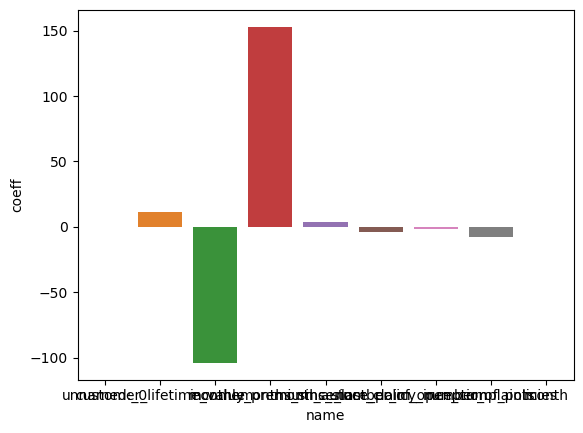

In [480]:
# Feature importance plot 


sns.barplot(x=fi_df["name"], y=fi_df["coeff"])

In [481]:
X_train["income"].describe()

count     8182.000000
mean     37514.384625
std      30368.983779
min          0.000000
25%          0.000000
50%      33738.000000
75%      62068.750000
max      99981.000000
Name: income, dtype: float64

In [482]:
X_train["monthly_premium_auto"].describe()

count    8182.000000
mean       93.340504
std        34.858551
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly_premium_auto, dtype: float64

# Run the 2nd iteration of the model, adding the categorical data

In [483]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [484]:
df = df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [485]:
df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [486]:
categoricals = df.select_dtypes(include=object)
numericals = df.select_dtypes(include = np.number)

In [487]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [488]:
from sklearn.preprocessing import OrdinalEncoder

In [489]:
categoricals.education.unique() # Just doing this to input unique values below 

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [490]:
categoricals.vehicle_size.unique() # Just doing this to input unique values below 

array(['Medsize', 'Small', 'Large'], dtype=object)

In [491]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor", "Master", "Doctor"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small","Medsize","Large"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_35169/2984037272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])
/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_35169/2984037272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc.fit_transform(ordinals[["education"]])
/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_35169/2984037272.py:11: SettingWithCopyWarning: 
A value is tryin

In [492]:
ordinals

,coverage,education,vehicle_size
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0
...,...,...,...
10905,2.0,2.0,1.0
10906,0.0,1.0,1.0
10907,1.0,2.0,1.0
10908,2.0,1.0,1.0


In [497]:
nominals = pd.get_dummies(nominals)
nominals = nominals.astype(int) # Needed to add this as my nominals were presenting as true/false 

In [498]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [499]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [500]:
final_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,coverage,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2,0.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1,0.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2,0.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1,2.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1,2.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1,0.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2,1.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2,2.0,...,1,0,0,0,0,0,1,0,0,1


In [539]:
final_df.columns.unique()

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

In [509]:
X = final_df.drop(["total_claim_amount"], axis=1) 
y = final_df[["total_claim_amount"]]

In [510]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,coverage,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,4809.216960,48029,61,7.000000,52,0.000000,9,2,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,2228.525238,0,64,3.000000,26,0.000000,1,1,0.0,1.0,...,0,1,0,1,0,0,0,0,0,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,2,0.0,2.0,...,0,1,0,0,0,0,1,0,0,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,1,1.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,1,2.0,2.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1,2.0,2.0,...,0,0,1,0,1,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,1,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,2,1.0,2.0,...,0,0,1,0,0,1,0,0,0,1
10908,11971.977650,64195,158,0.000000,27,4.000000,6,2,2.0,1.0,...,1,0,0,0,0,0,1,0,0,1


In [511]:
y

,total_claim_amount
0,292.800000
1,744.924331
2,480.000000
3,484.013411
4,707.925645
...,...
10905,1214.400000
10906,273.018929
10907,381.306996
10908,618.288849


In [512]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [513]:
scaler = PowerTransformer() # Here I opted for PowerTransformer as many of the numerical variables have a skew

pt = scaler # Abbreviated for ease of coding 

X_train_fit = pt.fit(X_train) 

# Transform the training data

X_train_trans = pt.transform(X_train)

# Transform X_test data 

X_test_trans = pt.transform(X_test)

In [514]:
lm = LinearRegression()
model = lm.fit(X_train_trans,y_train)

In [515]:
model.coef_

array([[ 6.14976156e+00, -1.86906781e+01,  8.60479913e+01,
         3.84840306e+00, -7.26780145e-01, -2.44212935e+00,
        -2.68293636e+00, -7.91411441e-01,  1.92984713e+01,
        -4.97223455e+00, -1.41137656e+00, -8.24753595e+14,
        -1.05015851e+15, -6.19904354e+14, -9.60424975e+14,
        -6.00543384e+14, -1.09585214e+15, -1.09585214e+15,
         8.73741846e+13,  2.00500084e+14,  8.83411474e+13,
         7.01313092e+13,  1.80083527e+14, -3.15540088e+13,
        -3.15540088e+13,  1.81501011e+15,  2.22103845e+15,
         1.75714732e+15, -5.04745612e+14, -6.95061626e+14,
        -6.24396181e+14, -3.29230855e+14,  1.13417889e+15,
        -1.11462718e+12,  5.44564549e+14,  6.78558150e+14,
         8.88051705e+14, -2.06447371e+14, -2.53717521e+14,
        -2.92059067e+14,  1.75023434e+14,  2.65076390e+14,
         2.37722217e+14, -8.12337854e+14, -7.69437087e+14,
        -6.05625590e+14, -5.13391051e+14, -1.22783987e+14,
        -1.13219090e+14, -1.00964343e+14, -8.99004891e+1

In [516]:
model.intercept_

array([435.55857696])

In [517]:
random_customer = X_test.sample()

In [518]:
random_customer

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,coverage,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
2919,5206.761563,21594,71,16.0,23,3.0,3,1,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1


In [519]:
model.predict(random_customer)

/Users/matthewbatchelor/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[-1.34258337e+15]])

In [520]:
y_pred = model.predict(X_test_trans)

y_pred = pd.DataFrame(y_pred)

y_test = y_test.reset_index(drop=True)

resiudals_df = pd.concat([y_test,y_pred],axis=1)

residuals_df = resiudals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

residuals_df.head()

,y_test,y_pred,residual
0,475.423848,388.058577,87.365271
1,350.400000,423.308577,-72.908577
2,482.400000,526.058577,-43.658577
3,673.342650,583.683577,89.659073
4,302.400000,328.808577,-26.408577


In [522]:
mean_error = residuals_df["residual"].mean()

In [523]:
mean_error

0.6017520731421473

In [524]:
mse(y_test,y_pred)

21558.00990982339

In [525]:
mae(y_test,y_pred)

100.89644836908587

In [526]:
rmse = mse(y_test,y_pred, squared = False)

In [527]:
rmse

146.82646188553136

In [528]:
round(r2_score(y_test, y_pred),2)

0.74

In [529]:
y_pred_train = pd.DataFrame(model.predict(X_train_trans))

In [530]:
r2_score(y_train,y_pred_train)

0.7382334774421402

In [531]:
feature_names = list(X_train.columns)

In [532]:
coefficients = model.coef_

In [533]:
coefficients = [i for i in coefficients[0]]

In [534]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df_sorted = fi_df.sort_values(by="coeff", ascending=False)
fi_df_sorted

,name,coeff
26,location_code_Suburban,2.221038e+15
25,location_code_Rural,1.815010e+15
27,location_code_Urban,1.757147e+15
32,policy_type_Personal Auto,1.134179e+15
36,policy_Corporate L3,8.880517e+14
35,policy_Corporate L2,6.785582e+14
34,policy_Corporate L1,5.445645e+14
41,policy_Special L2,2.650764e+14
42,policy_Special L3,2.377222e+14
19,employmentstatus_Employed,2.005001e+14


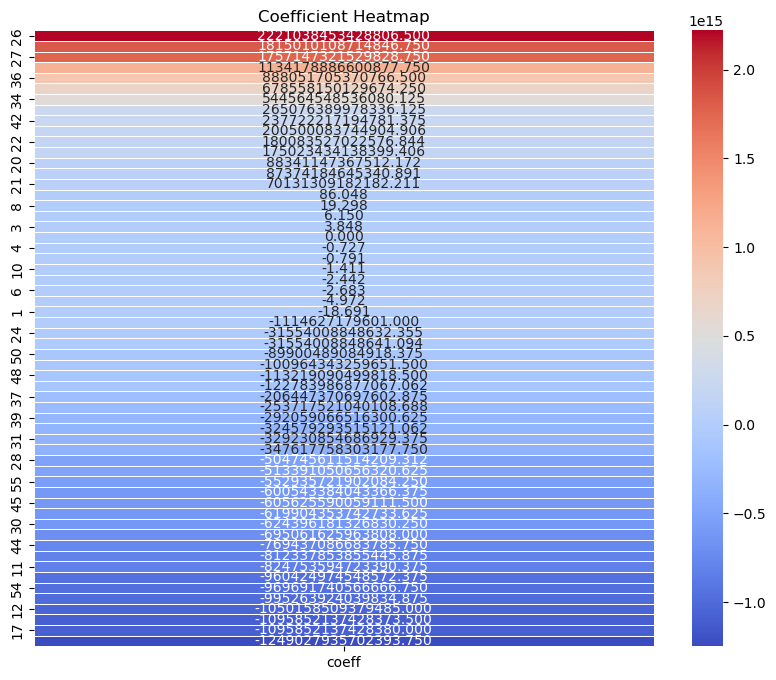

In [535]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming fi_df_sorted is your DataFrame with sorted coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(fi_df_sorted[['coeff']], annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Coefficient Heatmap')
plt.show()

<Axes: xlabel='name', ylabel='coeff'>

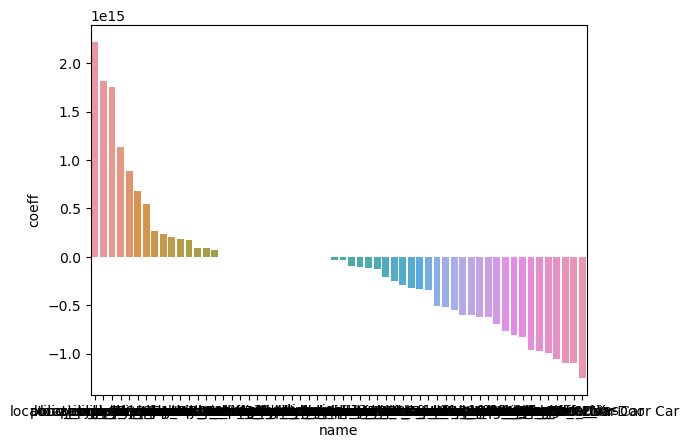

In [537]:
sns.barplot(x = fi_df_sorted["name"],y =fi_df_sorted["coeff"])

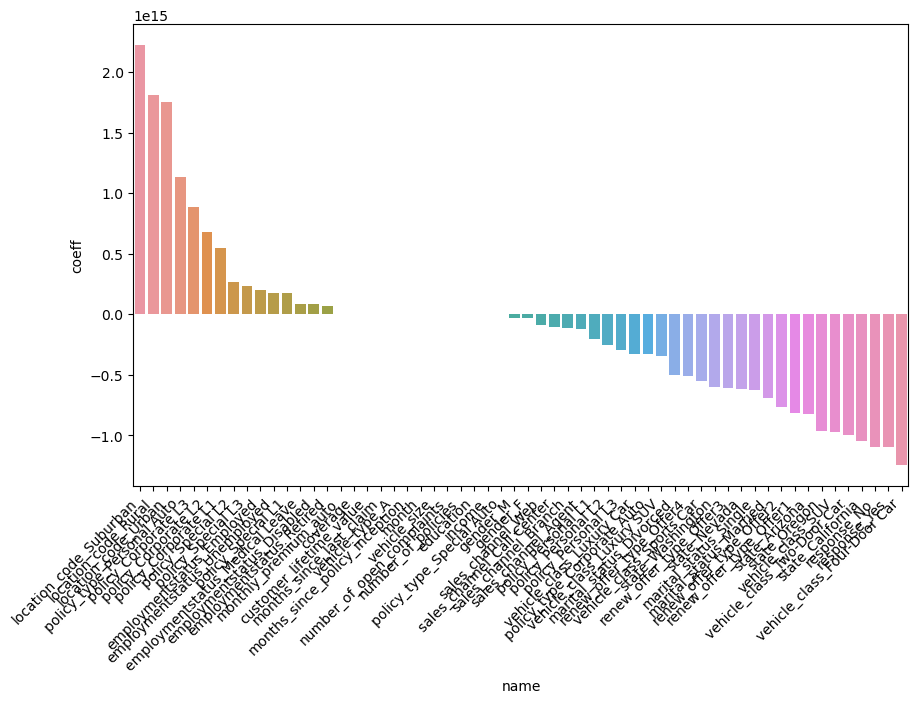

In [538]:
import matplotlib.pyplot as plt

# Assuming data is your DataFrame and fi_df_sorted is sorted
plt.figure(figsize=(10, 6))
sns.barplot(x=fi_df_sorted['name'], y=fi_df_sorted['coeff'])
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle
plt.show()